In [1]:
from csv import reader
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("final_data/ms_pacman/highscore/combined_trial_data.csv")

In [147]:
print(df.gaze_position_x.min())
print(df.gaze_position_x.max())
print(df.gaze_position_y.min())
print(df.gaze_position_y.max())

0.0
160.00000000000003
-209.9838969404187
-0.0


In [26]:
def scale_x(x):
    x = x + 34.55
    x = x/1.896
    return x

def scale_y(y):
    y = y + 55.85
    y = y/1.863
    return -y

df['gaze_position_x'] = df['gaze_position_x'].apply(lambda row: scale_x(row))
df['gaze_position_y'] = df['gaze_position_y'].apply(lambda row: scale_y(row))

print(df.gaze_position_x.min())
print(df.gaze_position_x.max())
print(df.gaze_position_y.min())
print(df.gaze_position_y.max())

0.0
160.00000000000003
-209.9838969404187
-0.0


In [3]:
df.head()

,frame_id,score,duration,unclipped_reward,action_int,gaze_position_x,gaze_position_y,action_str,trial_id
0,RZ_4303947_1,NaN,2817,0,4,60.316456,-93.397746,PLAYER_A_LEFT,118_RZ
1,RZ_4303947_1,NaN,2817,0,4,60.253165,-94.057971,PLAYER_A_LEFT,118_RZ
2,RZ_4303947_1,NaN,2817,0,4,60.242616,-94.471283,PLAYER_A_LEFT,118_RZ
3,RZ_4303947_1,NaN,2817,0,4,60.226793,-95.088567,PLAYER_A_LEFT,118_RZ
4,RZ_4303947_1,NaN,2817,0,4,60.205696,-95.276436,PLAYER_A_LEFT,118_RZ


In [4]:
df['id_num'] = df.apply(lambda x: x['frame_id'].split('_')[2], axis=1)

In [5]:
df.head()

,frame_id,score,duration,unclipped_reward,action_int,gaze_position_x,gaze_position_y,action_str,trial_id,id_num
0,RZ_4303947_1,NaN,2817,0,4,60.316456,-93.397746,PLAYER_A_LEFT,118_RZ,1
1,RZ_4303947_1,NaN,2817,0,4,60.253165,-94.057971,PLAYER_A_LEFT,118_RZ,1
2,RZ_4303947_1,NaN,2817,0,4,60.242616,-94.471283,PLAYER_A_LEFT,118_RZ,1
3,RZ_4303947_1,NaN,2817,0,4,60.226793,-95.088567,PLAYER_A_LEFT,118_RZ,1
4,RZ_4303947_1,NaN,2817,0,4,60.205696,-95.276436,PLAYER_A_LEFT,118_RZ,1


In [6]:
unique_frames = list(df.frame_id.unique())
n_frames = int(round(len(df.frame_id.unique())*0.8,0))
train_frames = unique_frames[0:n_frames]
test_frames = unique_frames[n_frames+1:]

training_data = df[df['frame_id'].isin(train_frames)]
test_data = df[df['frame_id'].isin(test_frames)]

In [106]:
# unique_frames = list(test_val_data.frame_id.unique())
# n_frames = int(round(len(test_val_data.frame_id.unique())*0.8,0))
# test_frames = unique_frames[0:n_frames]
# val_frames = unique_frames[n_frames+1:]
# 
# test_data = test_val_data[test_val_data['frame_id'].isin(test_frames)]
# val_data = test_val_data[test_val_data['frame_id'].isin(val_frames)]

In [7]:
import torch
import torchvision
import torchvision.transforms as transforms

In [8]:
# create labels file
training_data[['frame_id', 'action_int']].to_csv('train_labels.csv',index=False)
test_data[['frame_id', 'action_int']].to_csv('test_labels.csv',index=False)

In [9]:
train_labels = pd.read_csv("train_labels.csv")
test_labels = pd.read_csv("test_labels.csv")
train_labels.drop_duplicates(inplace=True)

In [10]:
def get_rows_array(filepath):

    with open(filepath) as obj:
            csv_reader = reader(obj)
            rows_list = []
            img_ids = []
            for row in csv_reader:
                img_ids.append(row[0])
                rr = np.array([int(r) for r in row[1:]])
                rows_list.append(rr)

    rows = np.array(rows_list)
    return rows, img_ids

rows, img_ids = get_rows_array("final_data/ms_pacman/highscore/ravelled_image_data.csv")

## need the rows to be repeated in the same manner as the frame ids in the df

In [11]:
keep_index = ([i for i, e in enumerate(img_ids) if e in train_labels.frame_id.values])
train_rows = rows[keep_index]

In [12]:
test_index = ([i for i, e in enumerate(img_ids) if e in test_labels.frame_id.values])
test_rows = rows[test_index]

In [265]:
# rows reshape
# image_shape = (210,160)

# train_new = []
# for each in train_rows:
    # train_new.append(each.reshape(image_shape))

# test_new = []
# for each in test_rows:
    # test_new.append(each.reshape(image_shape))

# train_rows = train_new
# test_rows = test_new

In [55]:
from sklearn.model_selection import train_test_split

train_x = train_rows
train_y = train_labels['action_int'].values

train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.1)

In [56]:
train_x = np.array(train_x)
val_x = np.array(val_x)

In [57]:
print(train_x.shape)
print(val_x.shape)

(25184, 33600)
(2799, 33600)


In [58]:
train_x = train_x.reshape(25184, 1, 210, 160)
val_x = val_x.reshape(2799, 1, 210, 160)

train_x = torch.from_numpy(train_x)
val_x = torch.from_numpy(val_x)

In [59]:
print(train_y.shape)
print(val_y.shape)

(25184,)
(2799,)


In [60]:
train_y = train_y.astype(int)
val_y = val_y.astype(int)

train_y = torch.from_numpy(train_y)
val_y = torch.from_numpy(val_y)

In [67]:
train_x = train_x.long()
train_y = train_y.long()
val_x = val_x.long()
val_y = val_y.long()

In [62]:
# importing the libraries
import pandas as pd
import numpy as np

# for reading and displaying images
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

In [63]:
class Net(Module):   
    def __init__(self):
        super(Net, self).__init__()

        self.cnn_layers = Sequential(
            # Defining a 2D convolution layer
            Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = Sequential(
            Linear(4 * 7 * 7, 10)
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [64]:
# defining the model
model = Net()
# defining the optimizer
optimizer = Adam(model.parameters(), lr=0.07)
# defining the loss function
criterion = CrossEntropyLoss()
# checking if GPU is available
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()
    
print(model)

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=196, out_features=10, bias=True)
  )
)


In [65]:
def train(epoch):
    model.train()
    tr_loss = 0
    # getting the training set
    x_train, y_train = Variable(train_x), Variable(train_y)
    # getting the validation set
    x_val, y_val = Variable(val_x), Variable(val_y)
    # converting the data into GPU format
    if torch.cuda.is_available():
        x_train = x_train.cuda()
        y_train = y_train.cuda()
        x_val = x_val.cuda()
        y_val = y_val.cuda()

    # clearing the Gradients of the model parameters
    optimizer.zero_grad()
    
    # prediction for training and validation set
    output_train = model(x_train)
    output_val = model(x_val)

    # computing the training and validation loss
    loss_train = criterion(output_train, y_train)
    loss_val = criterion(output_val, y_val)
    train_losses.append(loss_train)
    val_losses.append(loss_val)

    # computing the updated weights of all the model parameters
    loss_train.backward()
    optimizer.step()
    tr_loss = loss_train.item()
    if epoch%2 == 0:
        # printing the validation loss
        print('Epoch : ',epoch+1, '\t', 'loss :', loss_val)

In [66]:
# defining the number of epochs
n_epochs = 3
# empty list to store training losses
train_losses = []
# empty list to store validation losses
val_losses = []
# training the model
for epoch in range(n_epochs):
    train(epoch)

RuntimeError: expected scalar type Long but found Float

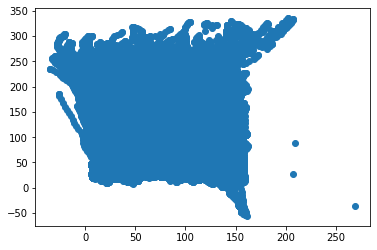

In [8]:
plt.scatter(df.gaze_position_x, df.gaze_position_y)

In [2]:
with open("/Users/nicolebasinski/Desktop/repos/erdos-project-2022--atari-HEAD/final_data/ms_pacman/highscore/ravelled_image_data.csv") as obj:
        csv_reader = reader(obj)
        rows_list = []
        for row in csv_reader:
                rr = np.array([int(r) for r in row])
                rows_list.append(rr)
rows = np.array(rows_list)
rows

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [3]:
rows.shape

(35196, 33600)

In [4]:
35196 * 0.2

7039.200000000001

In [5]:
ind = np.random.randint(35196, size=10000)

sample = rows[ind,:]

In [6]:
sample.shape

(10000, 33600)

In [7]:
# X = rows
# X = X/255
X = sample
X = X/255

In [8]:
# takes some time
# sample of 7040    3m 19.4s
# sample of 10000   6m 20.5s
# sample of 15000   15m 43.8s 
# sample of 20000   35m 51.1s
pca = PCA()
pca.fit(X)
pca.components_.shape
# gives back (a,b)\n",
# a is the number of principal components found\n",
# b is the original shape of the data features"

(10000, 33600)

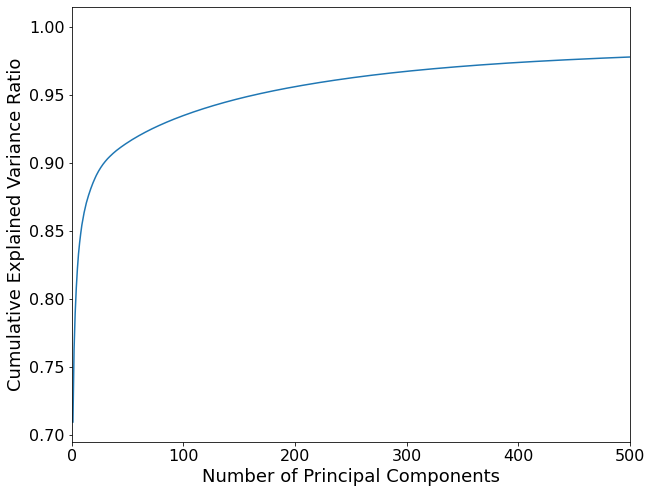

In [9]:
## make the explained variance curve\n",
plt.figure(figsize=(10,8))


plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
            np.cumsum(pca.explained_variance_ratio_))

plt.ylabel("Cumulative Explained Variance Ratio", fontsize=18)
plt.xlabel("Number of Principal Components", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlim(0,500)

plt.show()

In [54]:
pca = PCA(n_components=.95)

pca.fit(X)

pca.explained_variance_ratio_.shape
# returns the minimum number of components to use to explain the given fraction of variance

In [10]:
## RECONSTRUCT
## fit a PCA with 3000 comps
# pca = PCA(n_components=3000)
# pca.fit(X)

## Gives the projection onto the lower dimensional PCA space
X_tilde = pca.transform(X)

In [11]:
## This will give you the reconstruction
## Xtilde dot ws
## TO DO IMAGE SHAPE SHOULD BE 
image_shape = (210,160)
X_tilde[0,:].dot(pca.components_).reshape(image_shape)

array([[-3.36220521e-12,  9.47329491e-14,  1.41194734e-13, ...,
         7.02497866e-16,  2.59833364e-15,  5.64870973e-16],
       [-8.70149020e-02, -8.70149020e-02, -8.70149020e-02, ...,
        -8.70149020e-02, -8.70149020e-02, -8.70149020e-02],
       [-8.70149020e-02, -8.70149020e-02, -8.70149020e-02, ...,
        -8.70149020e-02, -8.70149020e-02, -8.70149020e-02],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

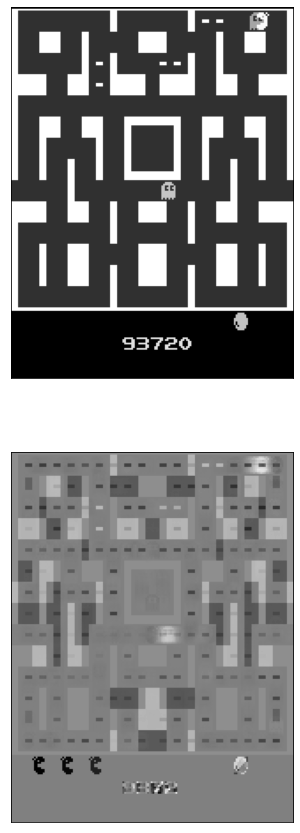

In [12]:
fig, ax = plt.subplots(2,1,figsize=(20,15),
                         subplot_kw = {'xticks':(), 'yticks':()})

n_components = 161
ax[0].imshow(X[100].reshape(image_shape), 
                      cmap='gray')
ax[1].imshow(X_tilde[100,:n_components].dot(pca.components_[:n_components,:]).reshape(image_shape), 
                      cmap='gray')

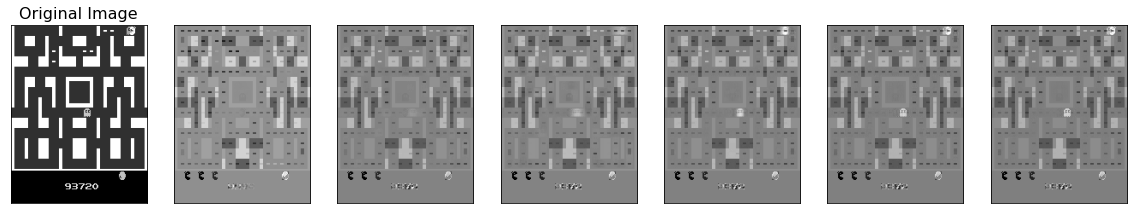

In [15]:
# set_style("white")

plt.show()
fig, ax = plt.subplots(
    1, 7, figsize=(20, 15), subplot_kw={"xticks": (), "yticks": ()}
)
ax[0].imshow(X[100].reshape(image_shape), cmap="gray")
ax[0].set_title("Original Image", fontsize=16)
i = 1
for n_components in [10, 50, 100, 500, 1000, 3000]:
    ax[i].imshow(
        X_tilde[100, :n_components]
        .dot(pca.components_[:n_components, :])
        .reshape(image_shape),
        cmap="gray",
    )
    i = i + 1